In [3]:
import pandas as pd
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
nltk.download("wordnet")
lema = nltk.WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [27]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [6]:
data = pd.read_csv("/content/Restaurant_Reviews.tsv", delimiter="\t")
veri = data.copy()
print(veri)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [8]:
cle = []
for i in range(len(veri)):
  duzenle = re.sub('[^a-zA-Z]',' ',veri["Review"][i])
  duzenle=duzenle.lower()
  duzenle=duzenle.split()
  duzenle=[lema.lemmatize(kelime) for kelime in duzenle if not kelime in set(stopwords.words("english"))]
  duzenle=' '.join(duzenle)
  cle.append(duzenle)


In [9]:
print(cle)

['wow loved place', 'crust good', 'tasty texture nasty', 'stopped late may bank holiday rick steve recommendation loved', 'selection menu great price', 'getting angry want damn pho', 'honeslty taste fresh', 'potato like rubber could tell made ahead time kept warmer', 'fry great', 'great touch', 'service prompt', 'would go back', 'cashier care ever say still ended wayyy overpriced', 'tried cape cod ravoli chicken cranberry mmmm', 'disgusted pretty sure human hair', 'shocked sign indicate cash', 'highly recommended', 'waitress little slow service', 'place worth time let alone vega', 'like', 'burrittos blah', 'food amazing', 'service also cute', 'could care le interior beautiful', 'performed', 'right red velvet cake ohhh stuff good', 'never brought salad asked', 'hole wall great mexican street taco friendly staff', 'took hour get food table restaurant food luke warm sever running around like totally overwhelmed', 'worst salmon sashimi', 'also combo like burger fry beer decent deal', 'like

In [12]:
df=pd.DataFrame(list(zip(veri["Review"],cle)),columns=["Orijinal Yorum", "Temiz Yorum"])
print(df)

                                        Orijinal Yorum  \
0                             Wow... Loved this place.   
1                                   Crust is not good.   
2            Not tasty and the texture was just nasty.   
3    Stopped by during the late May bank holiday of...   
4    The selection on the menu was great and so wer...   
..                                                 ...   
995  I think food should have flavor and texture an...   
996                           Appetite instantly gone.   
997  Overall I was not impressed and would not go b...   
998  The whole experience was underwhelming, and I ...   
999  Then, as if I hadn't wasted enough of my life ...   

                                           Temiz Yorum  
0                                      wow loved place  
1                                           crust good  
2                                  tasty texture nasty  
3    stopped late may bank holiday rick steve recom...  
4                 

In [13]:
frekans=(df["Temiz Yorum"]).apply(lambda x:pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
frekans.columns=["Kelimeler", "Frekans"]
print(frekans)

     Kelimeler  Frekans
0          wow      3.0
1        loved     10.0
2        place    111.0
3        crust      2.0
4         good     95.0
...        ...      ...
1764     ninja      1.0
1765    wasted      1.0
1766    poured      1.0
1767     wound      1.0
1768   drawing      1.0

[1769 rows x 2 columns]


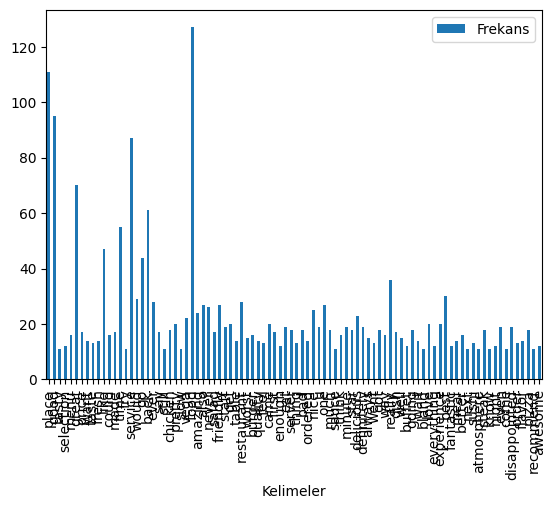

In [15]:
filtre=frekans[frekans["Frekans"]>10]
filtre.plot.bar(x="Kelimeler", y = "Frekans")
plt.show()

In [18]:
cv=CountVectorizer(max_features=1500)
matrix= cv.fit_transform(cle).toarray()
matrixdf=pd.DataFrame(matrix,columns=cv.get_feature_names_out())
print(matrixdf)

     absolute  absolutely  absolutley  accident  accommodation  accomodate  \
0           0           0           0         0              0           0   
1           0           0           0         0              0           0   
2           0           0           0         0              0           0   
3           0           0           0         0              0           0   
4           0           0           0         0              0           0   
..        ...         ...         ...       ...            ...         ...   
995         0           0           0         0              0           0   
996         0           0           0         0              0           0   
997         0           0           0         0              0           0   
998         0           0           0         0              0           0   
999         0           0           0         0              0           0   

     accordingly  accountant  ache  acknowledged  ...  year  ye

In [19]:
print(veri["Liked"].unique())

[1 0]


In [35]:

y=veri.iloc[:,1].values


In [36]:
X_train, X_test, y_train, y_test = train_test_split(matrix,y,test_size=0.2,random_state=0)

model = GaussianNB()
model.fit(X_train,y_train)
tahmin=model.predict(X_test)

skor=accuracy_score(y_test,tahmin)
print(skor*100)

69.0
